In [1]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/afs/cern.ch/user/j/jcapotor/FBGana/src')
sys.path.insert(1, '/afs/cern.ch/user/j/jcapotor/FBGana/ana_tools')
import manage_data
import getters
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.mlab as mlab
import xlrd
import datetime

In [37]:
plt.style.use('./presentation.mplstyle')
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('FebruaryRuns_joint_analysis.pdf', "w")

The first thing to show are the 4 temperature profiles taken in the climatic chamber for the days 20-24 of fEBRUARY 2023.

In [38]:
path_to_split_20 = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230220/"
path_to_split_21 = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230221/"
path_to_split_22 = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230222/"
path_to_split_23 = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230223/"
path_to_split_24 = "/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230224/"
path_to_split_list = [path_to_split_21, path_to_split_22, path_to_split_23, path_to_split_24]

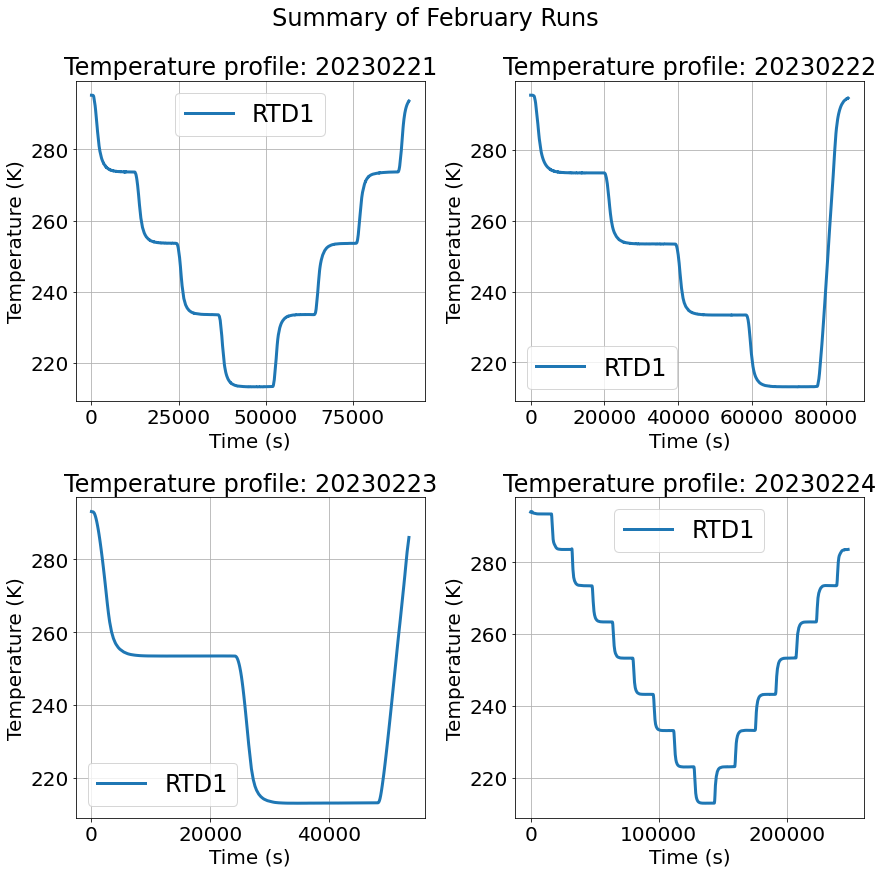

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12.5, 12.5)
fig.suptitle("Summary of February Runs")
axes = []
for axis in ax:
    for axises in axis:
        axes.append(axises)
ax = axes
nfile=0
for path_to_split in path_to_split_list:
    date = path_to_split.split("/")[-2]
    temp = pd.read_csv(path_to_split+"temperature.txt", header=0)
    t0 = temp["Timestamp"][0]
    ax[nfile].plot(temp["Timestamp"]-temp["Timestamp"][0], temp["T1"], label="RTD1")
    ax[nfile].set_title("Temperature profile: " + date)
    ax[nfile].set_xlabel("Time (s)")
    ax[nfile].set_ylabel("Temperature (K)")
    ax[nfile].grid("on")
    ax[nfile].legend()
    nfile += 1
fig.tight_layout()

In [41]:
pp.savefig(fig)

In [5]:
plateaus = {
    "20230221":{"273_down":[10000,12300], "253_down":[22000,24300], "233_down":[34000,36300], "213_down":[45000,52000], "233_up":[61000,64000], "253_up":[73000,76000], "273_up":[85000,88000]},
    "20230222":{"273_down":[14000,19800], "253_down":[34000,39000], "233_down":[53000,58200], "213_down":[68000,77300]},
    "20230223":{"253_down":[12500,24000], "213_down":[34000,48000]},
    "20230224":{"293_down":[11900,15900], "283_down":[27750,31750], "273_down":[43650,47650], "263_down":[59550,63550], "253_down":[75450,79450], "243_down":[91350,95350],
    "233_down":[106450,110450], "223_down":[122350,126350], "213_down":[138250,142250], "223_up":[154150,158150], "233_up":[170050,174050], "243_up":[186000,190000],
    "253_up":[201900,205900], "263_up":[217800,221800], "273_up":[233700,237700]}
}

results = {}
for plateau in plateaus:
    results[plateau] = {}
    for key in plateaus[plateau]:
        results[plateau][key] = {}

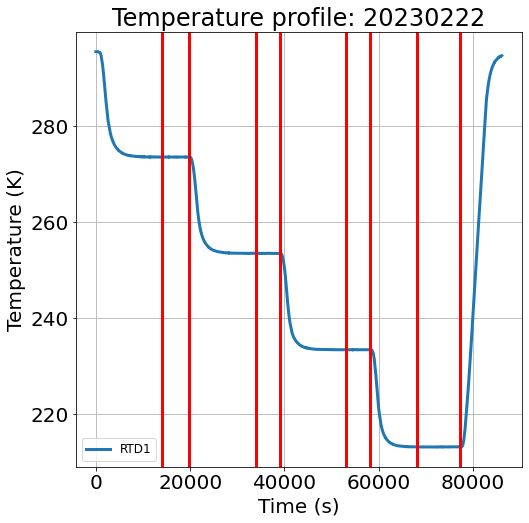

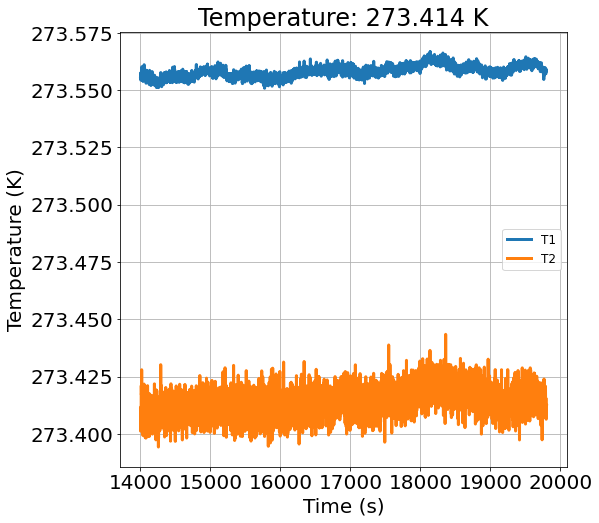

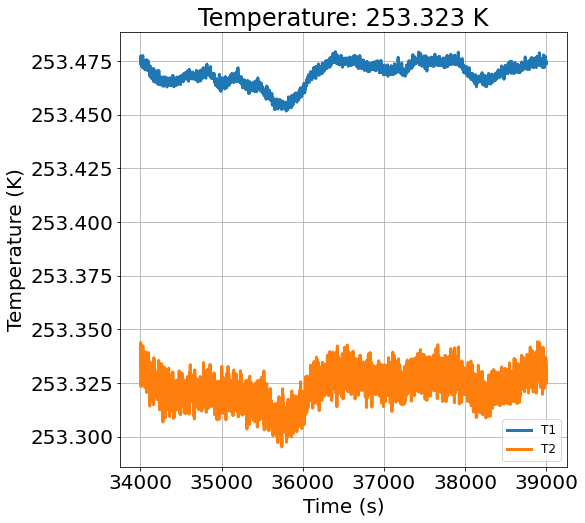

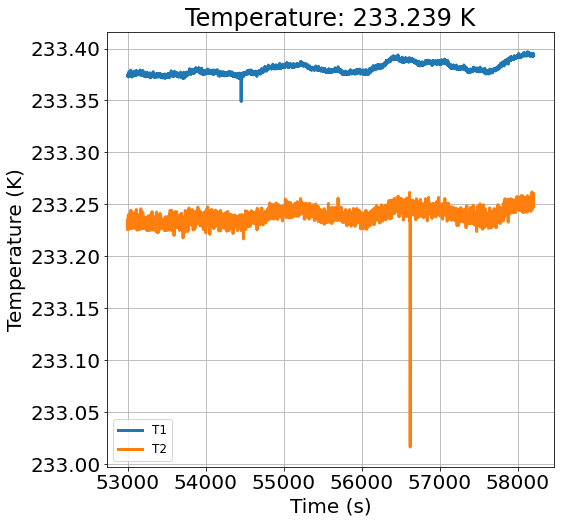

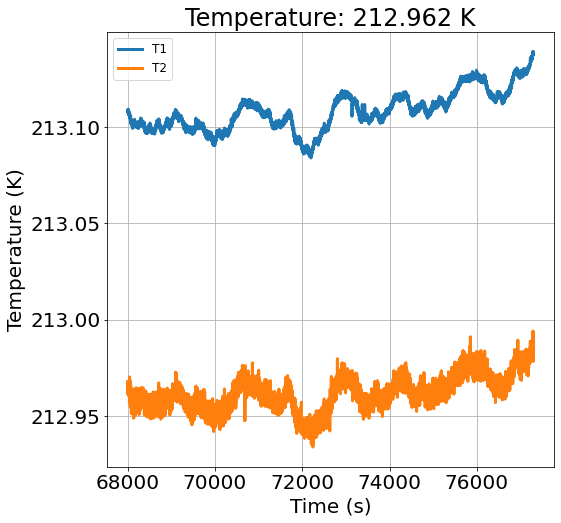

In [148]:
path_to_split = path_to_split_22
date = "20230222"
temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
t0 = temp_p["Timestamp"][0]
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
axes.plot(temp_p["Timestamp"]-t0, temp_p["T1"], label="RTD1")
axes.set_title("Temperature profile: " + date)
axes.set_xlabel("Time (s)")
axes.set_ylabel("Temperature (K)")
axes.legend(fontsize=12)
for key in plateaus[date].keys():
    plt.figure(figsize=(8,8))
    for col in temp_p.columns:
        if col == "Datetime" or col=="Timestamp" or col == "Date" or col =="Time" or col =="Unnamed: 0" or col[-1]=="r":
            continue
        axes.axvline(x=plateaus[date][key][0], color="red")
        axes.axvline(x=plateaus[date][key][1], color="red")
        plt.plot(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])]["Timestamp"] -t0,
        temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])][col],
        label=col
        )
        plt.title("Temperature: " + str(np.round(np.mean(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])][col]),3)) + " K")
        plt.xlabel("Time (s)")
        plt.ylabel("Temperature (K)")
        plt.legend(fontsize=12)

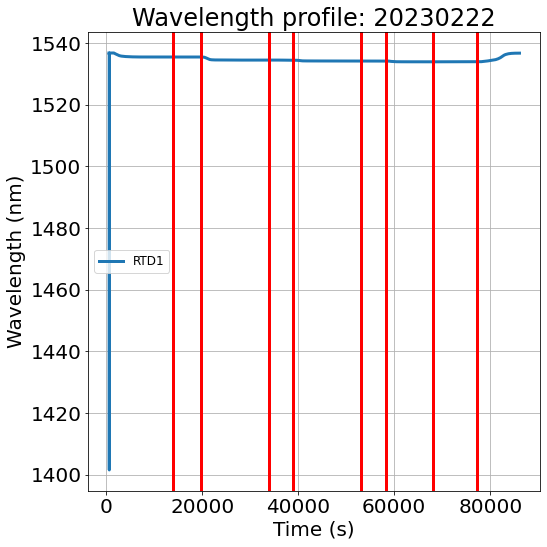

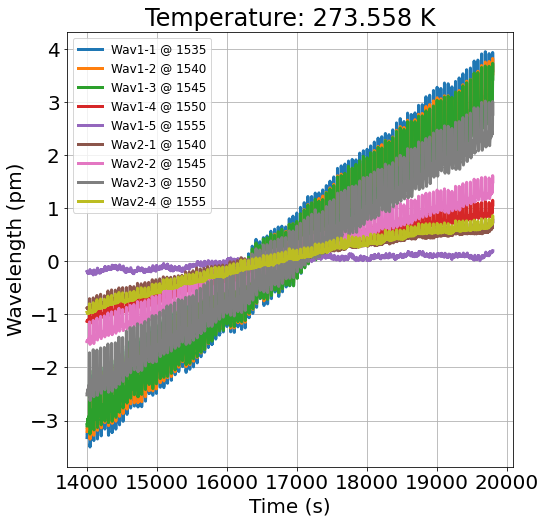

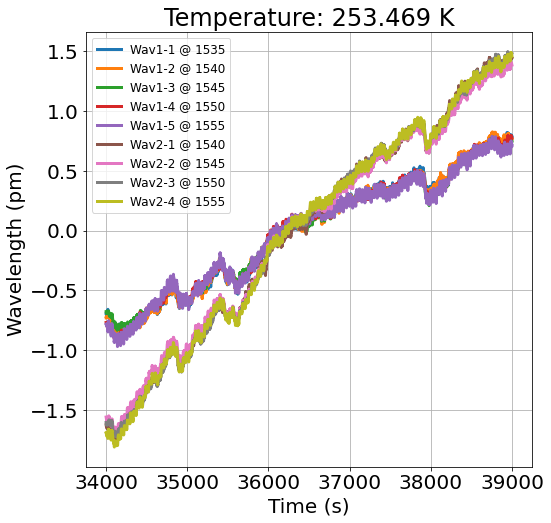

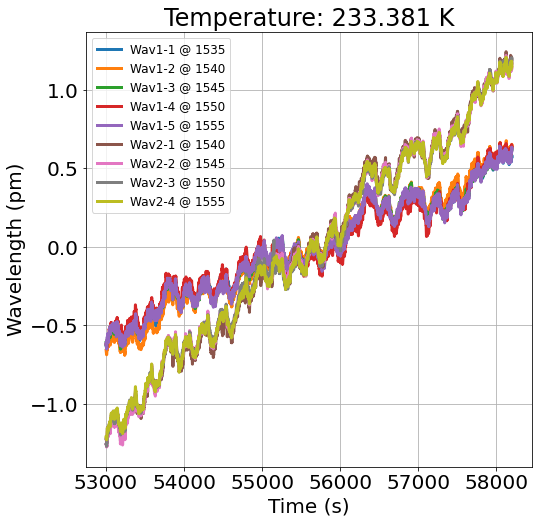

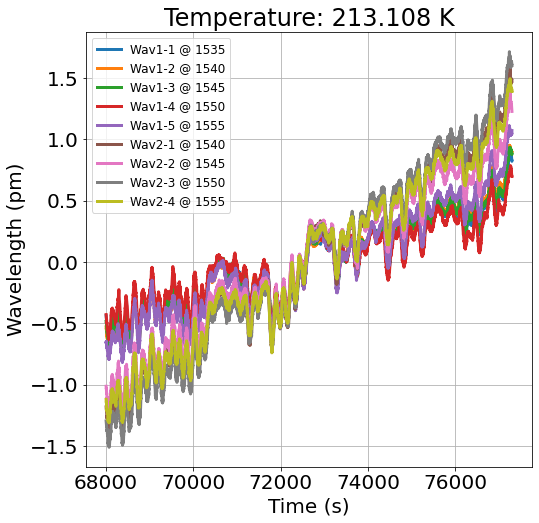

In [149]:
sensors_teorics = [1535,1540,1545,1550,1555,1540,1545,1550,1555]
path_to_split = path_to_split_22
date = "20230222"
temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
t0 = temp_p["Timestamp"][0]
peaks_p = getters.get_data(path_to_split=path_to_split, pol="P")
peaks_p = peaks_p.loc[(peaks_p["Wav1-1"]>1.4e-6)]
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
axes.plot(peaks_p["Timestamp"]-t0, peaks_p["Wav1-1"]*1e9, label="RTD1")
axes.set_title("Wavelength profile: " + date)
axes.set_xlabel("Time (s)")
axes.set_ylabel("Wavelength (nm)")
axes.legend(fontsize=12)
fig.tight_layout()
for key in plateaus[date].keys():
    plt.figure(figsize=(8,8))
    cnt = 0
    for col in peaks_p.columns:
        if col[0] != "W" or col[-1]=="r":
            continue
        axes.axvline(x=plateaus[date][key][0], color="red")
        axes.axvline(x=plateaus[date][key][1], color="red")
        plt.plot(peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])]["Timestamp"] -t0,
        peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])][col]*1e12 - np.mean(peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])][col]*1e12),
        label=col + " @ "+ str(sensors_teorics[cnt])
        )
        plt.title("Temperature: " + str(np.round(np.mean(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])]["T1"]),3)) + " K")
        plt.xlabel("Time (s)")
        plt.ylabel("Wavelength (pm)")
        plt.legend(fontsize=12)
        cnt += 1

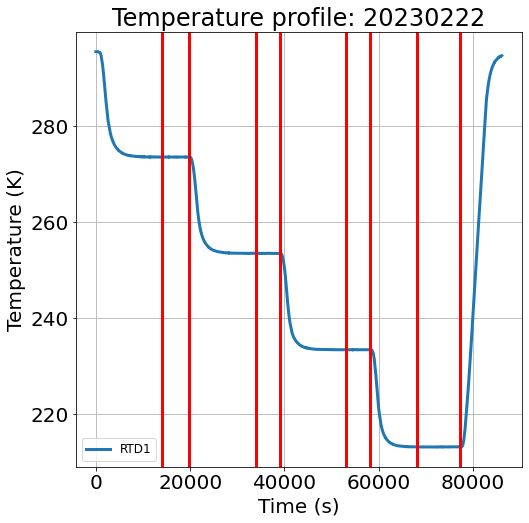

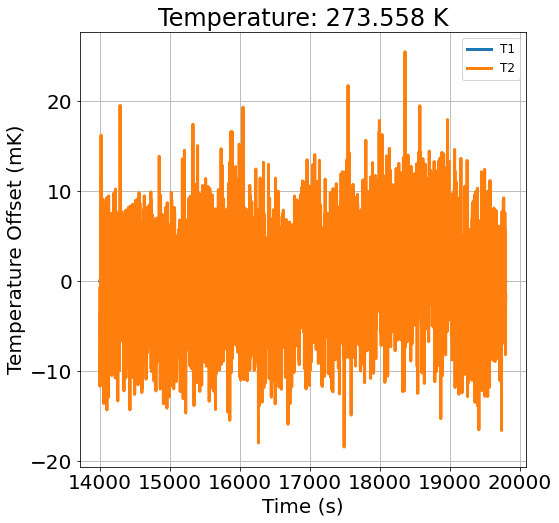

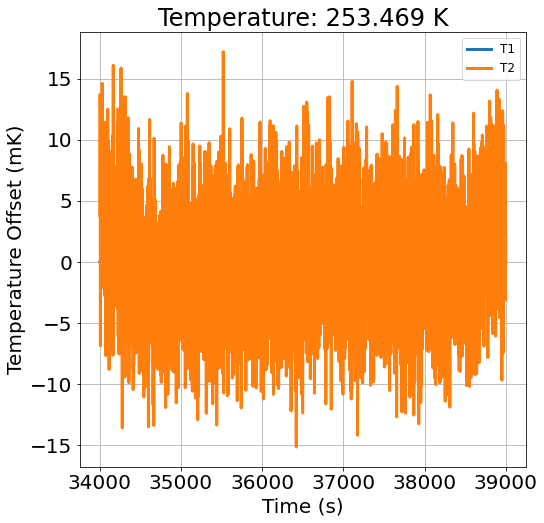

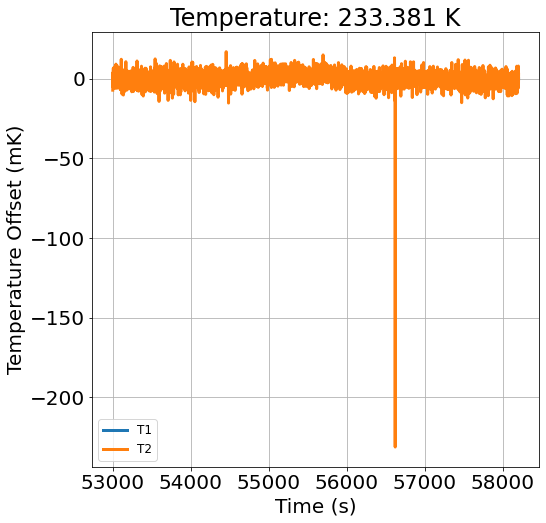

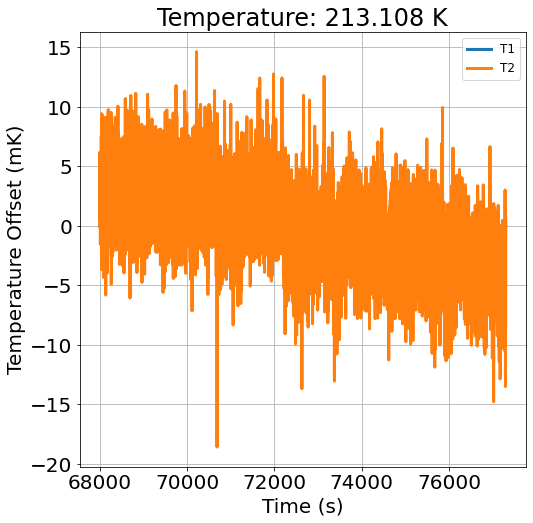

In [150]:
ref = "T1"
path_to_split = path_to_split_22
date = "20230222"
temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
t0 = temp_p["Timestamp"][0]
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
axes.plot(temp_p["Timestamp"]-t0, temp_p["T1"], label="RTD1")
axes.set_title("Temperature profile: " + date)
axes.set_xlabel("Time (s)")
axes.set_ylabel("Temperature (K)")
axes.legend(fontsize=12)
for key in plateaus[date].keys():
    plt.figure(figsize=(8,8))
    for col in temp_p.columns:
        if col == "Datetime" or col=="Timestamp" or col == "Date" or col =="Time" or col =="Unnamed: 0" or col[-1]=="r":
            continue
        axes.axvline(x=plateaus[date][key][0], color="red")
        axes.axvline(x=plateaus[date][key][1], color="red")
        plt.plot(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])]["Timestamp"] -t0,
        (temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])][col] - temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])][ref] - np.mean(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])][col] - temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])][ref]))*1e3,
        label=col
        )
        plt.title("Temperature: " + str(np.round(np.mean(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])]["T1"]),3)) + " K")
        plt.xlabel("Time (s)")
        plt.ylabel("Temperature Offset (mK)")
        plt.legend(fontsize=12)

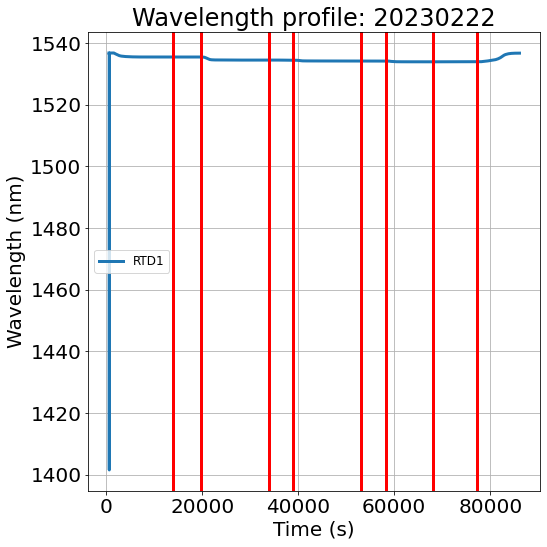

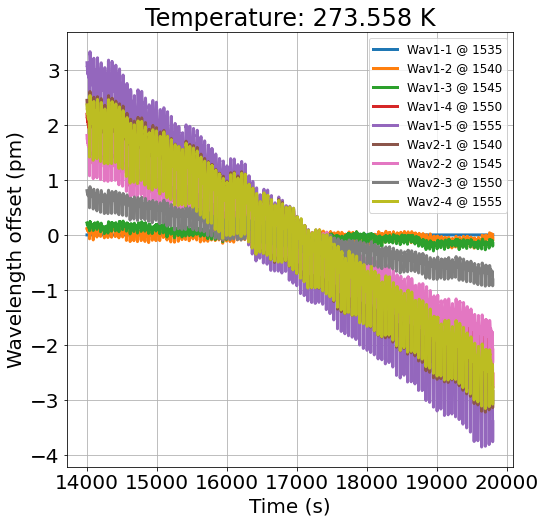

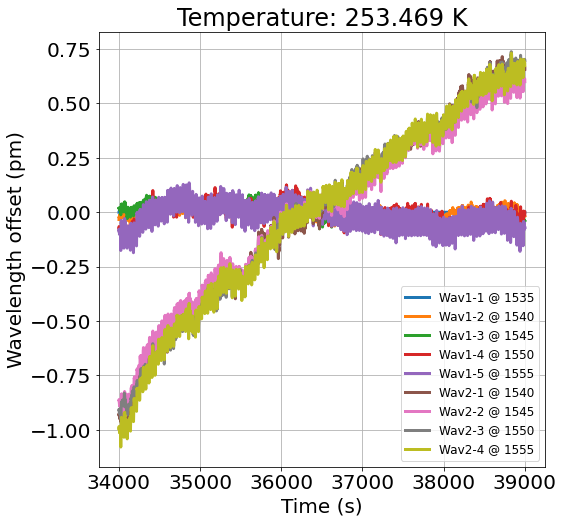

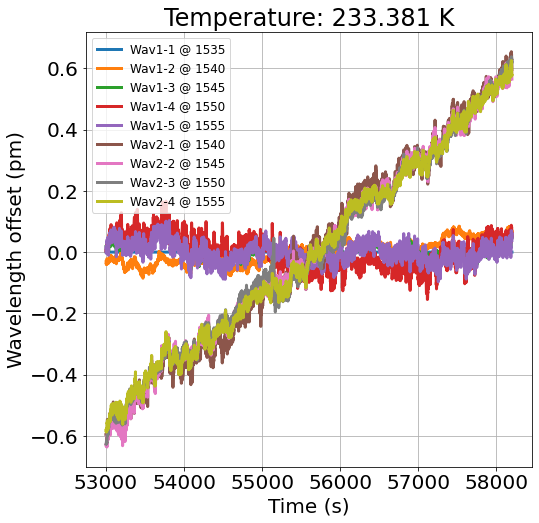

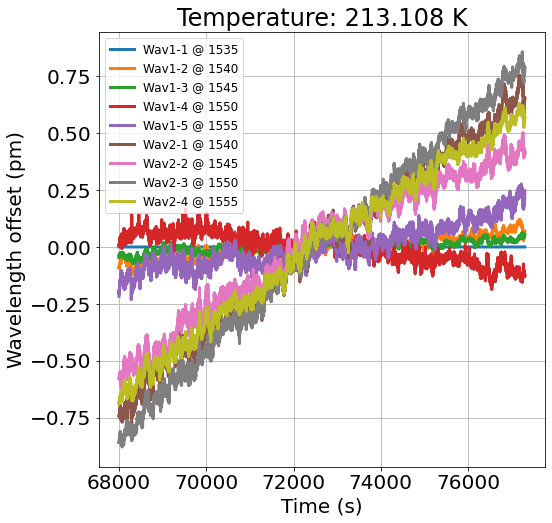

In [151]:
ref = "Wav1-1"
sensors_teorics = [1535,1540,1545,1550,1555,1540,1545,1550,1555]
path_to_split = path_to_split_22
date = "20230222"
temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
t0 = temp_p["Timestamp"][0]
peaks_p = getters.get_data(path_to_split=path_to_split, pol="P")
peaks_p = peaks_p.loc[(peaks_p["Wav1-1"]>1.4e-6)]
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
axes.plot(peaks_p["Timestamp"]-t0, peaks_p["Wav1-1"]*1e9, label="RTD1")
axes.set_title("Wavelength profile: " + date)
axes.set_xlabel("Time (s)")
axes.set_ylabel("Wavelength (nm)")
axes.legend(fontsize=12)
fig.tight_layout()
for key in plateaus[date].keys():
    plt.figure(figsize=(8,8))
    cnt = 0
    for col in peaks_p.columns:
        if col[0] != "W" or col[-1]=="r":
            continue
        axes.axvline(x=plateaus[date][key][0], color="red")
        axes.axvline(x=plateaus[date][key][1], color="red")
        plt.plot(peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])]["Timestamp"] -t0,
        peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])][col]*1e12 - peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])][ref]*1e12 - np.mean(peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])][col]*1e12 - peaks_p.loc[(peaks_p["Timestamp"]-t0 > plateaus[date][key][0]) & (peaks_p["Timestamp"]-t0 < plateaus[date][key][1])][ref]*1e12),
        label=col + " @ "+ str(sensors_teorics[cnt])
        )
        plt.title("Temperature: " + str(np.round(np.mean(temp_p.loc[(temp_p["Timestamp"]-t0 > plateaus[date][key][0]) & (temp_p["Timestamp"]-t0 < plateaus[date][key][1])]["T1"]),3)) + " K")
        plt.xlabel("Time (s)")
        plt.ylabel("Wavelength offset (pm)")
        plt.legend(fontsize=12)
        cnt += 1

The wavelength difference with respect to the teoric value as a function of temperature. There are 9 plots, one for each sensor, each plot containing 8 curves. For each run 2 curves are added to the plot, one for the slope-down and the other one for the rise-up.

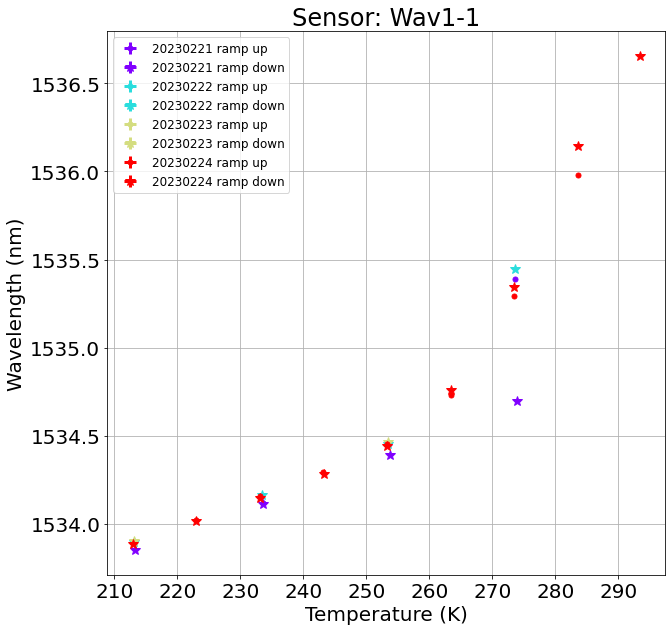

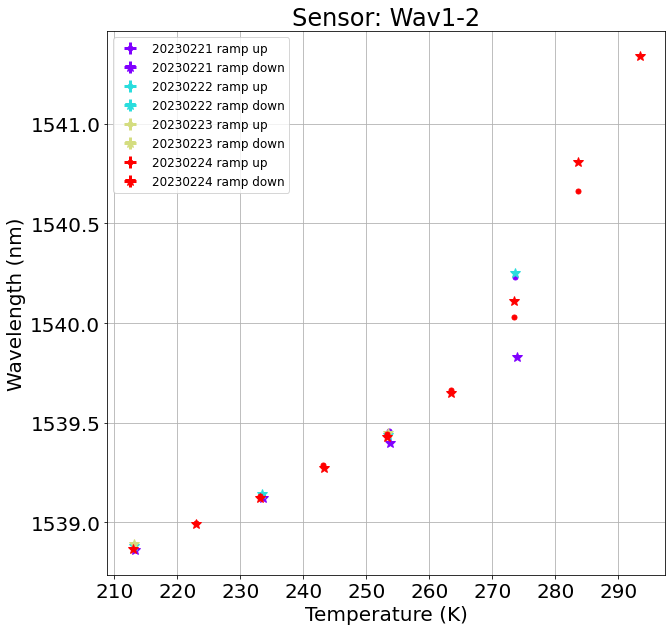

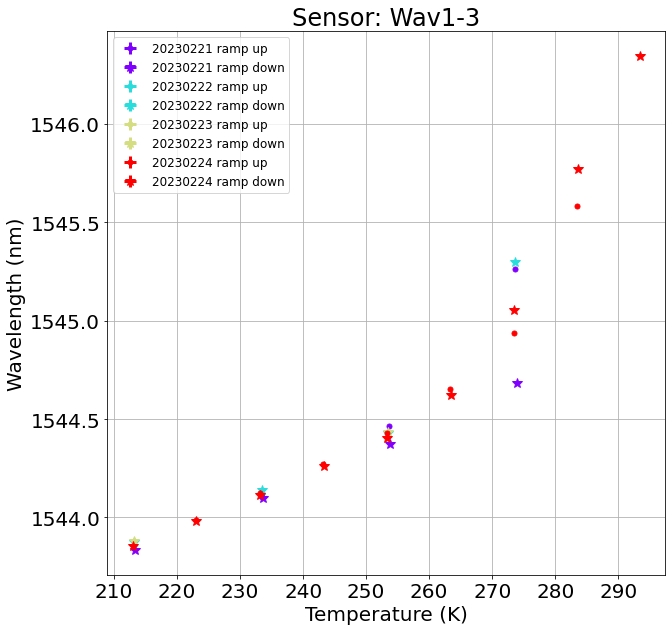

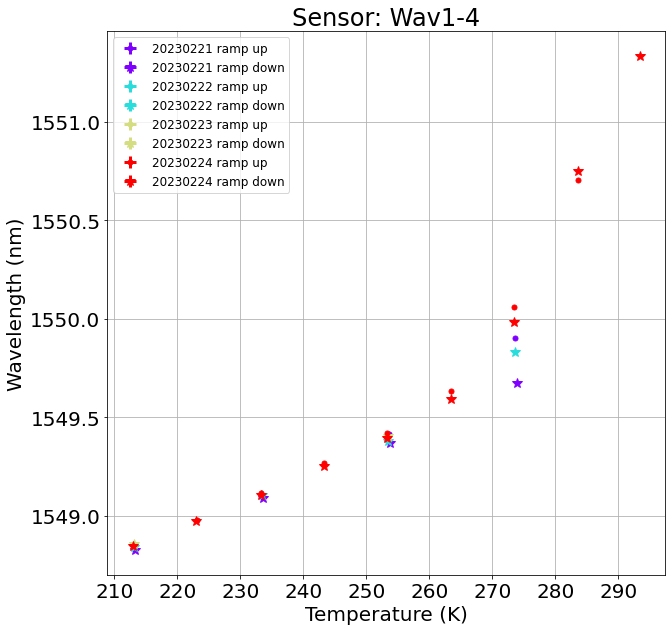

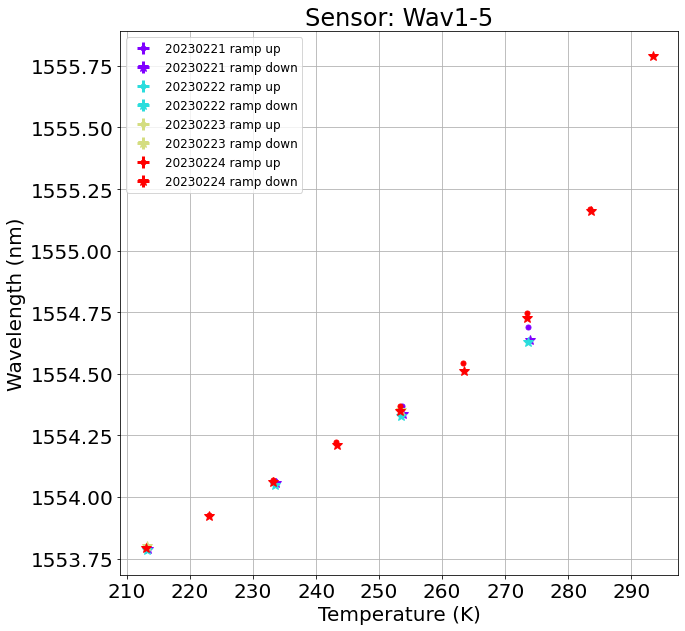

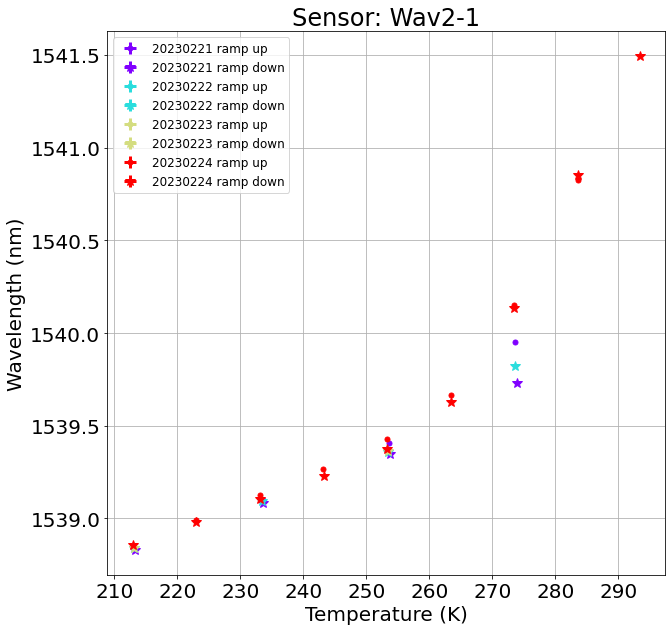

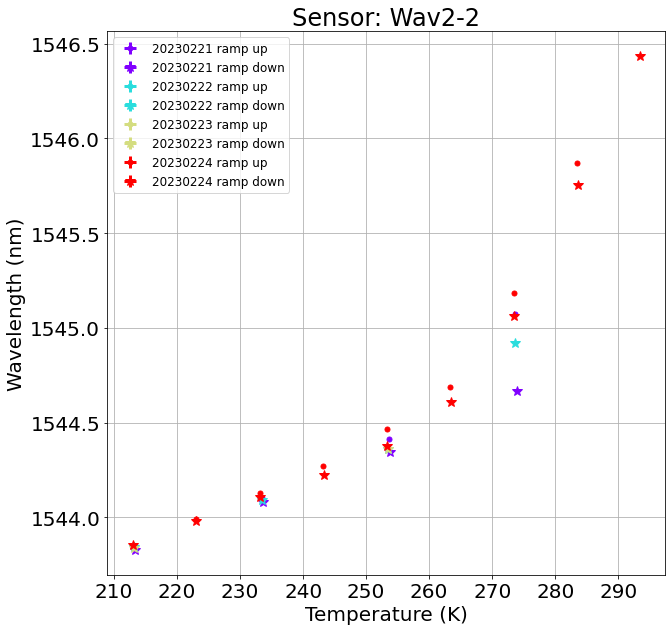

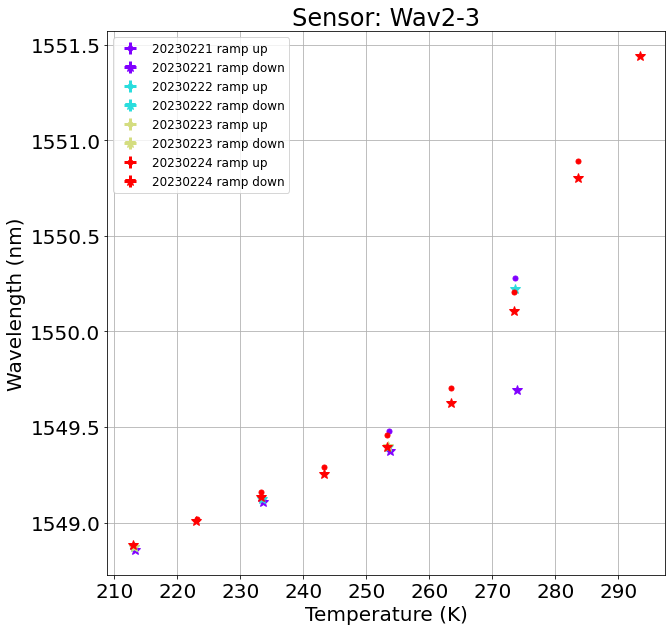

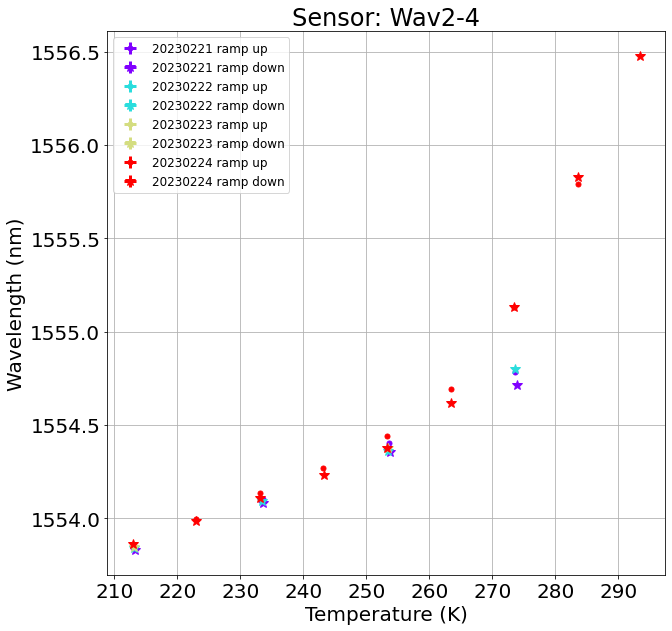

In [91]:
sensors = ["Wav1-1","Wav1-2","Wav1-3","Wav1-4","Wav1-5","Wav2-1","Wav2-2","Wav2-3","Wav2-4"]
path_to_split_list = [path_to_split_21, path_to_split_22, path_to_split_23, path_to_split_24]
colors = plt.cm.rainbow(np.linspace(0, 1, len(path_to_split_list)))
for sensor in sensors:
    plt.figure(figsize=(10,10))
    nfile=0
    for path_to_split in path_to_split_list:
        date = path_to_split.split("/")[-2]
        peaks_p = getters.get_data(path_to_split=path_to_split, pol="P")
        temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
        t0 = temp_p["Timestamp"][0]
        file_plateau = plateaus[date]
        for plateau in file_plateau.keys():
            pp = peaks_p.loc[(peaks_p["Timestamp"]-t0 > file_plateau[plateau][0]) & (peaks_p["Timestamp"]-t0 < file_plateau[plateau][1])]
            temp = temp_p.loc[(temp_p["Timestamp"]-t0 > file_plateau[plateau][0]) & (temp_p["Timestamp"]-t0 < file_plateau[plateau][1])]
            mean_p = np.mean(pp[sensor])*1e9
            std_p = np.std(pp[sensor])*1e9
            mean_t = np.mean(temp["T1"])
            std_t = np.std(temp["T1"])
            results[date][plateau]["Mean_P"] = (mean_p)
            results[date][plateau]["Std_P"] = (std_p)
            results[date][plateau]["Mean_T"] = (mean_t)
            results[date][plateau]["Std_T"] = (std_t)
            if plateau[-1] == "p":
                results[date][plateau]["Ramp"] = "up"
            else:
                results[date][plateau]["Ramp"] = "down"
        results1 = pd.DataFrame(results[date]).T
        plt.errorbar(results1.loc[results1["Ramp"]=="down"]["Mean_T"],
        results1.loc[results1["Ramp"]=="down"]["Mean_P"],
        xerr=results1.loc[results1["Ramp"]=="down"]["Std_T"],
        yerr=results1.loc[results1["Ramp"]=="down"]["Std_P"],
        fmt=".",
        markersize=10,
        color=colors[nfile],
        label=date + " ramp down")
        plt.errorbar(results1.loc[results1["Ramp"]=="up"]["Mean_T"],
        results1.loc[results1["Ramp"]=="up"]["Mean_P"],
        xerr=results1.loc[results1["Ramp"]=="up"]["Std_T"],
        yerr=results1.loc[results1["Ramp"]=="up"]["Std_P"],
        fmt="+",
        markersize=10,
        color=colors[nfile],
        label=date + " ramp up")
        nfile += 1
        plt.xlabel("Temperature (K)")
        plt.ylabel("Wavelength (nm)")
        plt.title("Sensor: " + sensor)
    plt.legend(fontsize=12)

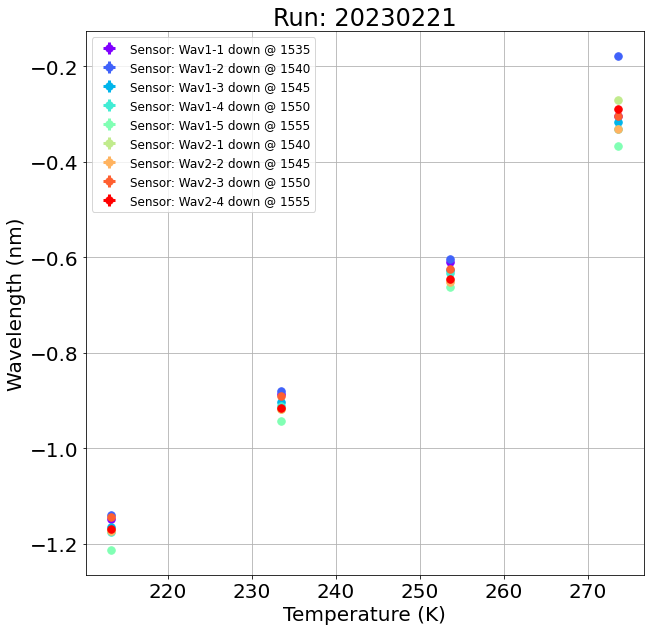

In [146]:
sensors = ["Wav1-1","Wav1-2","Wav1-3","Wav1-4","Wav1-5","Wav2-1","Wav2-2","Wav2-3","Wav2-4"]
sensors_teorics = [1535,1540,1545,1550,1555,1540,1545,1550,1555]
path_to_split_list = [path_to_split_21, path_to_split_22, path_to_split_23, path_to_split_24]
path_to_split_list = [path_to_split_22]
colors = plt.cm.rainbow(np.linspace(0, 1, len(sensors)))
for path_to_split in path_to_split_list:
    plt.figure(figsize=(10,10))
    nfile=0
    for sensor in sensors:
        date = path_to_split.split("/")[-2]
        peaks_p = getters.get_data(path_to_split=path_to_split, pol="P")
        temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
        t0 = temp_p["Timestamp"][0]
        file_plateau = plateaus[date]
        for plateau in file_plateau.keys():
            pp = peaks_p.loc[(peaks_p["Timestamp"]-t0 > file_plateau[plateau][0]) & (peaks_p["Timestamp"]-t0 < file_plateau[plateau][1])]
            temp = temp_p.loc[(temp_p["Timestamp"]-t0 > file_plateau[plateau][0]) & (temp_p["Timestamp"]-t0 < file_plateau[plateau][1])]
            mean_p = np.mean(pp[sensor])*1e9
            std_p = np.std(pp[sensor])*1e9
            mean_t = np.mean(temp["T1"])
            std_t = np.std(temp["T1"])
            results[date][plateau]["Mean_P"] = (mean_p)
            results[date][plateau]["Std_P"] = (std_p)
            results[date][plateau]["Mean_T"] = (mean_t)
            results[date][plateau]["Std_T"] = (std_t)
            if plateau[-1] == "p":
                results[date][plateau]["Ramp"] = "up"
            else:
                results[date][plateau]["Ramp"] = "down"
        results1 = pd.DataFrame(results[date]).T
        plt.errorbar(results1.loc[results1["Ramp"]=="down"]["Mean_T"],
        results1.loc[results1["Ramp"]=="down"]["Mean_P"] - sensors_teorics[nfile],
        xerr=results1.loc[results1["Ramp"]=="down"]["Std_T"],
        yerr=results1.loc[results1["Ramp"]=="down"]["Std_P"],
        fmt=".",
        markersize=15,
        color=colors[nfile],
        label="Sensor: " + sensor + " down @ " + str(sensors_teorics[nfile]))
        plt.xlabel("Temperature (K)")
        plt.ylabel("Wavelength (nm)")
        plt.title("Run: " + date)
        nfile += 1
    plt.legend(fontsize=12)

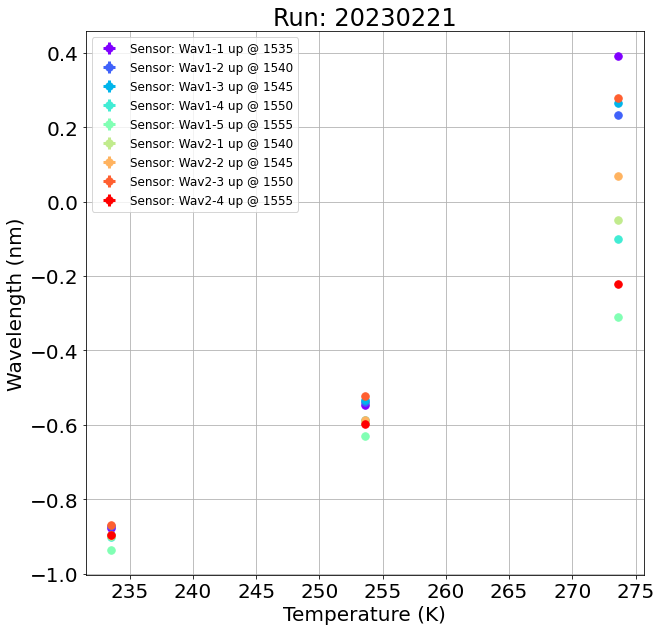

In [147]:
sensors = ["Wav1-1","Wav1-2","Wav1-3","Wav1-4","Wav1-5","Wav2-1","Wav2-2","Wav2-3","Wav2-4"]
path_to_split_list = [path_to_split_21, path_to_split_22, path_to_split_23, path_to_split_24]
path_to_split_list = [path_to_split_21]
colors = plt.cm.rainbow(np.linspace(0, 1, len(sensors)))
for path_to_split in path_to_split_list:
    plt.figure(figsize=(10,10))
    nfile=0
    for sensor in sensors:
        date = path_to_split.split("/")[-2]
        peaks_p = getters.get_data(path_to_split=path_to_split, pol="P")
        temp_p = pd.read_csv(path_to_split+"temperature.txt", header=0)
        t0 = temp_p["Timestamp"][0]
        file_plateau = plateaus[date]
        for plateau in file_plateau.keys():
            pp = peaks_p.loc[(peaks_p["Timestamp"]-t0 > file_plateau[plateau][0]) & (peaks_p["Timestamp"]-t0 < file_plateau[plateau][1])]
            temp = temp_p.loc[(temp_p["Timestamp"]-t0 > file_plateau[plateau][0]) & (temp_p["Timestamp"]-t0 < file_plateau[plateau][1])]
            mean_p = np.mean(pp[sensor])*1e9
            std_p = np.std(pp[sensor])*1e9
            mean_t = np.mean(temp["T1"])
            std_t = np.std(temp["T1"])
            results[date][plateau]["Mean_P"] = (mean_p)
            results[date][plateau]["Std_P"] = (std_p)
            results[date][plateau]["Mean_T"] = (mean_t)
            results[date][plateau]["Std_T"] = (std_t)
            if plateau[-1] == "p":
                results[date][plateau]["Ramp"] = "up"
            else:
                results[date][plateau]["Ramp"] = "down"
        results1 = pd.DataFrame(results[date]).T
        plt.errorbar(results1.loc[results1["Ramp"]=="up"]["Mean_T"],
        results1.loc[results1["Ramp"]=="up"]["Mean_P"] - sensors_teorics[nfile],
        xerr=results1.loc[results1["Ramp"]=="up"]["Std_T"],
        yerr=results1.loc[results1["Ramp"]=="up"]["Std_P"],
        fmt=".",
        markersize=15,
        color=colors[nfile],
        label="Sensor: " + sensor + " up @ " + str(sensors_teorics[nfile]))
        plt.xlabel("Temperature (K)")
        plt.ylabel("Wavelength (nm)")
        plt.title("Run: " + date)
        nfile += 1
    plt.legend(fontsize=12)

In [6]:
print(plateaus)
print(path_to_split_list)

{'20230221': {'273_down': [10000, 12300], '253_down': [22000, 24300], '233_down': [34000, 36300], '213_down': [45000, 52000], '233_up': [61000, 64000], '253_up': [73000, 76000], '273_up': [85000, 88000]}, '20230222': {'273_down': [14000, 19800], '253_down': [34000, 39000], '233_down': [53000, 58200], '213_down': [68000, 77300]}, '20230223': {'253_down': [12500, 24000], '213_down': [34000, 48000]}, '20230224': {'293_down': [11900, 15900], '283_down': [27750, 31750], '273_down': [43650, 47650], '263_down': [59550, 63550], '253_down': [75450, 79450], '243_down': [91350, 95350], '233_down': [106450, 110450], '223_down': [122350, 126350], '213_down': [138250, 142250], '223_up': [154150, 158150], '233_up': [170050, 174050], '243_up': [186000, 190000], '253_up': [201900, 205900], '263_up': [217800, 221800], '273_up': [233700, 237700]}}
['/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230221/', '/eos/user/j/jcapotor/FBGana/camara_climatica/FebruaryRuns/20230222/', '/eos/user/j/jca

In [22]:
i = 0
sensors = ["Wav1-1", "Wav1-2", "Wav1-3"]
results = []
for path in path_to_split_list:
    temp = pd.read_csv(path+"temperature.txt", header=0)
    humidity = pd.read_csv(path+"humidity.csv", header=0)
    peaks = getters.get_data(path_to_split=path, pol="P")
    peaks_s = getters.get_data(path_to_split=path, pol="S")
    t0 = temp["Timestamp"][0]
    date = path.split("/")[-2]
    rhs = []
    temps = []
    wl_seps1, wl_seps2, wl_seps3 = [], [], []
    wl1, wl2, wl3 = [], [], []
    for key in plateaus[date].keys():
        tini, tend = plateaus[date][key][0], plateaus[date][key][1]
        temp_cut = temp.loc[(temp["Timestamp"]-t0>tini)&(temp["Timestamp"]-t0<tend)].reset_index(drop=True)
        humidity_cut = humidity.loc[((humidity["Timestamp"]-t0>tini)&(humidity["Timestamp"]-t0<tend))].reset_index(drop=True)
        peaks_cut = peaks.loc[(peaks["Timestamp"]-t0>tini)&(peaks["Timestamp"]-t0<tend)]
        peaks_s_cut = peaks_s.loc[(peaks_s["Timestamp"]-t0>tini)&(peaks_s["Timestamp"]-t0<tend)]
        t0_cut = temp["Timestamp"][0]
        mean_t = np.mean(temp_cut["T1"])
        mean_rh = np.mean(humidity_cut["RH"])
        temps.append(np.round(mean_t,3))
        rhs.append(mean_rh)
        wl_seps1.append(np.abs(np.mean(+(peaks_cut[sensors[0]] - peaks_s_cut[sensors[0]])*1e12)))
        wl_seps2.append(np.abs(np.mean(+(peaks_cut[sensors[1]] - peaks_s_cut[sensors[1]])*1e12)))
        wl_seps3.append(np.abs(np.mean(+(peaks_cut[sensors[2]] - peaks_s_cut[sensors[2]])*1e12)))
        wl1.append(np.mean(+(peaks_cut[sensors[0]] + peaks_s_cut[sensors[0]])*1e12)/2)
        wl2.append(np.mean(+(peaks_cut[sensors[1]] + peaks_s_cut[sensors[1]])*1e12)/2)
        wl3.append(np.mean(+(peaks_cut[sensors[2]] + peaks_s_cut[sensors[2]])*1e12)/2)
    results.append([temps, wl_seps1, wl_seps2, wl_seps3, wl1, wl2, wl3, rhs])
    i += 1

TypeError: 'dict_keys' object is not subscriptable

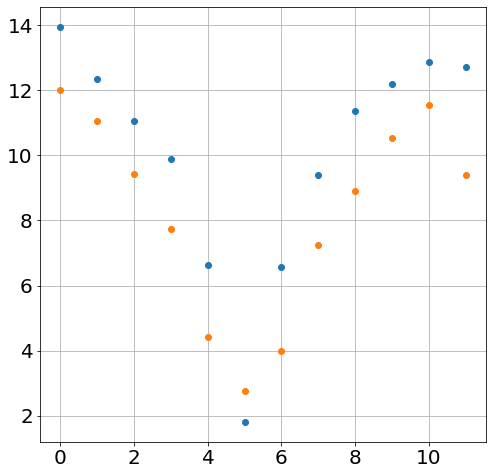

In [39]:
plt.figure(figsize=(8,8))
# plt.plot(results[3][1], "o", label="Wav1-1")
plt.plot(results[3][2][3:], "o", label="Wav1-2")
plt.plot(results[3][3][3:], "o", label="Wav1-3")
plt.xticks(range(12), plateaus["20230224"].keys(), rotation=90)
plt.xlabel("Temp (K)")
plt.ylabel("Wavelength separation (pm)")
plt.title("Wavelength separation between polarisations")
plt.figure(figsize=(8,8))
plt.plot(results[3][4] - results[3][4][0], "o", label="Wav1-1")
plt.plot(results[3][5] - results[3][5][0], "o", label="Wav1-2")
plt.plot(results[3][6] - results[3][6][0], "o", label="Wav1-3")
plt.xticks(range(15), plateaus["20230224"].keys(), rotation=90)
plt.xlabel("Temp (K)")
plt.ylabel("Av. Pol. Wavelength (pm)")
plt.title("Average polarisation wavelength vs temp")

In [64]:
i = 0
sensor = "Wav1-4"
ref = "Wav1-1"
results = []
for path in path_to_split_list:
    temp = pd.read_csv(path+"temperature.txt", header=0)
    humidity = pd.read_csv(path+"humidity.csv", header=0)
    peaks = getters.get_data(path_to_split=path, pol="P")
    peaks_s = getters.get_data(path_to_split=path, pol="S")
    t0 = temp["Timestamp"][0]
    date = path.split("/")[-2]
    rhs = []
    temps = []
    wl_seps = []
    wl_seps_err = []
    for key in plateaus[date].keys():
        tini, tend = plateaus[date][key][0], plateaus[date][key][1]
        temp_cut = temp.loc[(temp["Timestamp"]-t0>tini)&(temp["Timestamp"]-t0<tend)].reset_index(drop=True)
        humidity_cut = humidity.loc[((humidity["Timestamp"]-t0>tini)&(humidity["Timestamp"]-t0<tend))].reset_index(drop=True)
        peaks_cut = peaks.loc[(peaks["Timestamp"]-t0>tini)&(peaks["Timestamp"]-t0<tend)]
        peaks_s_cut = peaks_s.loc[(peaks_s["Timestamp"]-t0>tini)&(peaks_s["Timestamp"]-t0<tend)]
        t0_cut = temp["Timestamp"][0]
        mean_t = np.mean(temp_cut["T1"])
        std_t = np.std(temp_cut["T1"])
        mean_rh = np.mean(humidity_cut["RH"])
        mean_wl_sep = np.mean((peaks_cut[sensor] - peaks_s_cut[sensor]))
        std_wl_sep = np.std((peaks_cut[sensor] - peaks_s_cut[sensor]))
        temps.append(mean_t)
        rhs.append(mean_rh)
        wl_seps.append(np.abs(np.mean(+(peaks_cut[ref] - peaks_s_cut[ref])*1e12 - (peaks_cut[sensor] - peaks_s_cut[sensor])*1e12)))
    results.append([temps, wl_seps, rhs])
    i += 1

Text(0.5, 1.0, 'Wavelength separation between polarisations')

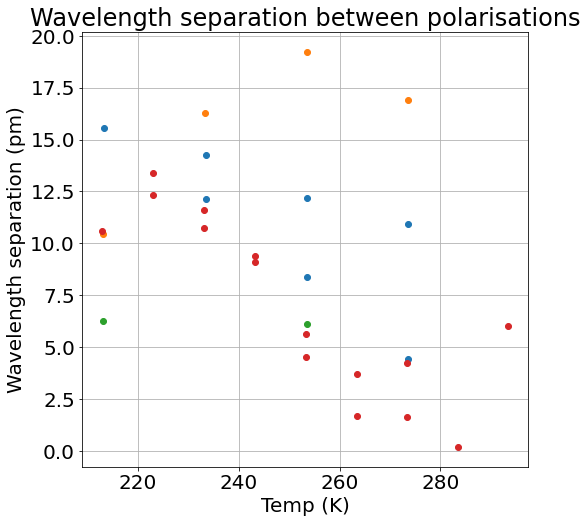

In [65]:
plt.figure(figsize=(8,8))
plt.plot(results[0][0], results[0][1], "o")
plt.plot(results[1][0], results[1][1], "o")
plt.plot(results[2][0], results[2][1], "o")
plt.plot(results[3][0], results[3][1], "o")
#plt.plot(rhs, wl_seps, "o")
plt.xlabel("Temp (K)")
plt.ylabel("Wavelength separation (pm)")
plt.title("Wavelength separation between polarisations")

In [11]:
plt.figure(figsize=(8,8))
i = 0
sensor = "Wav1-1"
for path in path_to_split_list:
    temp = pd.read_csv(path+"temperature.txt", header=0)
    humidity = pd.read_csv(path+"humidity.csv", header=0)
    peaks = getters.get_data(path_to_split=path, pol="P")
    peaks_s = getters.get_data(path_to_split=path, pol="S")
    t0 = temp["Timestamp"][0]
    date = path.split("/")[-2]
    tini, tend = plateaus[date]["213_down"][0], plateaus[date]["213_down"][1]
    temp = temp.loc[(temp["Timestamp"]-t0>tini)&(temp["Timestamp"]-t0<tend)].reset_index(drop=True)
    humidity = humidity.loc[((humidity["Timestamp"]-t0>tini)&(humidity["Timestamp"]-t0<tend))].reset_index(drop=True)
    peaks = peaks.loc[(peaks["Timestamp"]-t0>tini)&(peaks["Timestamp"]-t0<tend)]
    peaks_s = peaks_s.loc[(peaks_s["Timestamp"]-t0>tini)&(peaks_s["Timestamp"]-t0<tend)]
    t0 = temp["Timestamp"][0]
    # plt.plot(peaks["Timestamp"]-t0, (peaks["Wav1-1"]-peaks[sensor])*1e12, ".", color=colors[i], label=date+" <-> P")
    # plt.plot(peaks["Timestamp"]-t0, (peaks_s["Wav1-1"]-peaks_s[sensor])*1e12, "+", color=colors[i], label=date+" <-> S")
    plt.plot(peaks["Timestamp"]-t0, ((peaks_s["Wav1-1"]-peaks_s[sensor] + peaks["Wav1-1"]-peaks[sensor])/2)*1e12,
        "o",
        label=r"{0}; T={1:.3f}+-{2:.3f} K; RH={3:.1f}+-{4:.2f} %".format(date, np.mean(temp["T1"]), np.std(temp["T1"]), np.mean(humidity["RH"]), np.std(humidity["RH"])))
    plt.title("Ormocer-T <-> " + sensor + " @ 213K")
    plt.ylabel("Wavelength Offset wrt to Wav1-1 (pm)")
    plt.xlabel("Time (s)")
    plt.legend(fontsize=10)
    i += 1

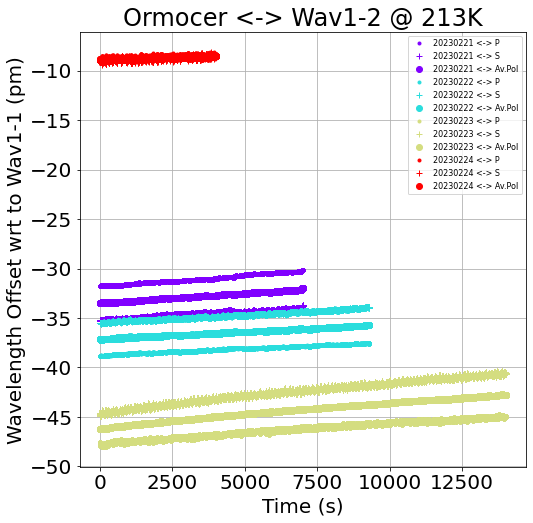

In [13]:
colors = plt.cm.rainbow(np.linspace(0,1,4))
for sensor in ["Wav2-2", "Wav2-3", "Wav2-4"]:    
    plt.figure(figsize=(8,8))
    i = 0
    for path in path_to_split_list:
        temp = pd.read_csv(path+"temperature.txt", header=0)
        peaks = getters.get_data(path_to_split=path, pol="P")
        peaks_s = getters.get_data(path_to_split=path, pol="S")
        t0 = temp["Timestamp"][0]
        date = path.split("/")[-2]
        tini, tend = plateaus[date]["213_down"][0], plateaus[date]["213_down"][1]
        temp = temp.loc[(temp["Timestamp"]-t0>tini)&(temp["Timestamp"]-t0<tend)].reset_index(drop=True)
        peaks = peaks.loc[(peaks["Timestamp"]-t0>tini)&(peaks["Timestamp"]-t0<tend)]
        peaks_s = peaks_s.loc[(peaks_s["Timestamp"]-t0>tini)&(peaks_s["Timestamp"]-t0<tend)]
        t0 = temp["Timestamp"][0]
        plt.plot(peaks["Timestamp"]-t0, (peaks["Wav2-1"]-peaks[sensor])*1e12, ".", color=colors[i], label=date+" <-> P")
        plt.plot(peaks["Timestamp"]-t0, (peaks_s["Wav2-1"]-peaks_s[sensor])*1e12, "+", color=colors[i], label=date+" <-> S")
        plt.plot(peaks["Timestamp"]-t0, ((peaks_s["Wav2-1"]-peaks_s[sensor] + peaks["Wav2-1"]-peaks[sensor])/2)*1e12, "o", color=colors[i], label=date+" <-> Av.Pol")
        plt.title("Ormocer <-> " + sensor + " @ 213K")
        plt.ylabel("Wavelength Offset wrt to Wav1-1 (pm)")
        plt.xlabel("Time (s)")
        plt.legend(fontsize=8)
        i += 1
    plt.show()

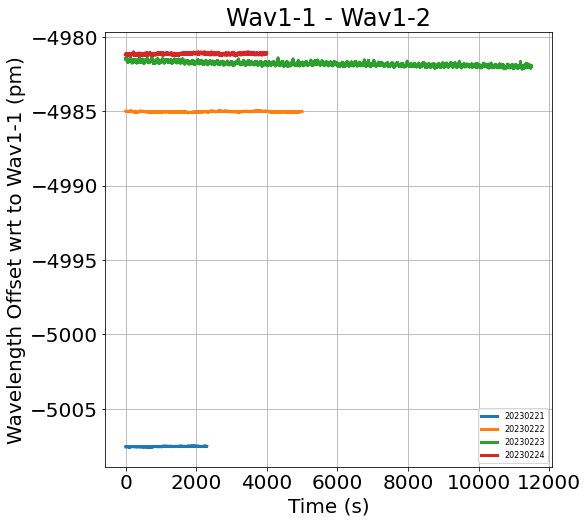

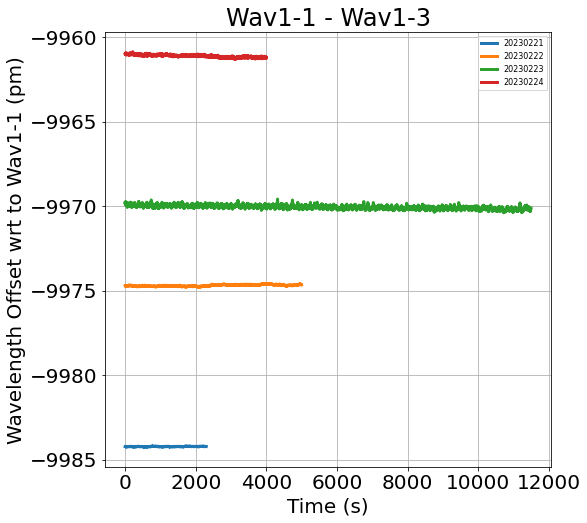

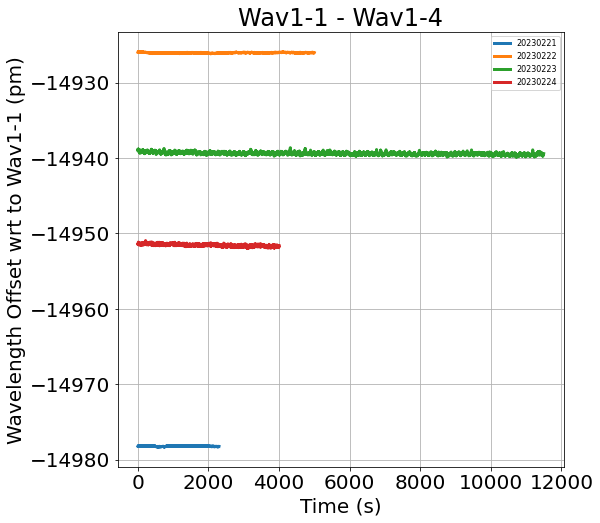

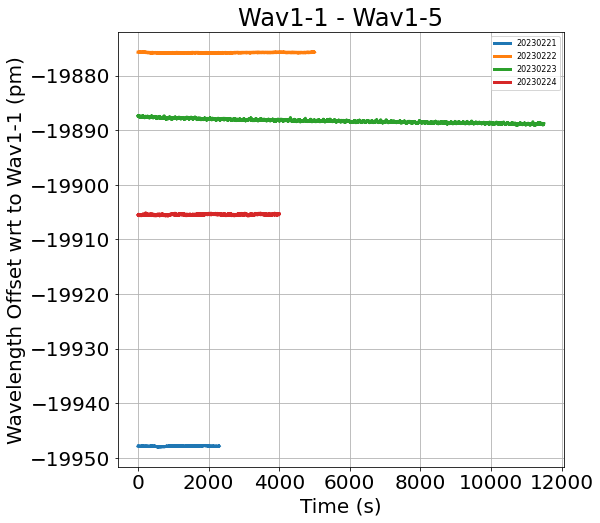

In [9]:
for sensor in ["Wav1-2", "Wav1-3", "Wav1-4", "Wav1-5"]:    
    plt.figure(figsize=(8,8))
    for path in path_to_split_list:
        temp = pd.read_csv(path+"temperature.txt", header=0)
        peaks = getters.get_data(path_to_split=path, pol="P")
        t0 = temp["Timestamp"][0]
        date = path.split("/")[-2]
        tini, tend = plateaus[date]["253_down"][0], plateaus[date]["253_down"][1]
        temp = temp.loc[(temp["Timestamp"]-t0>tini)&(temp["Timestamp"]-t0<tend)].reset_index(drop=True)
        peaks = peaks.loc[(peaks["Timestamp"]-t0>tini)&(peaks["Timestamp"]-t0<tend)]
        t0 = temp["Timestamp"][0]
        plt.plot(peaks["Timestamp"]-t0, (peaks["Wav1-1"]-peaks[sensor])*1e12, label=date)
        plt.title("Wav1-1 - " + sensor)
        plt.ylabel("Wavelength Offset wrt to Wav1-1 (pm)")
        plt.xlabel("Time (s)")
        plt.legend(fontsize=8)
    plt.show()

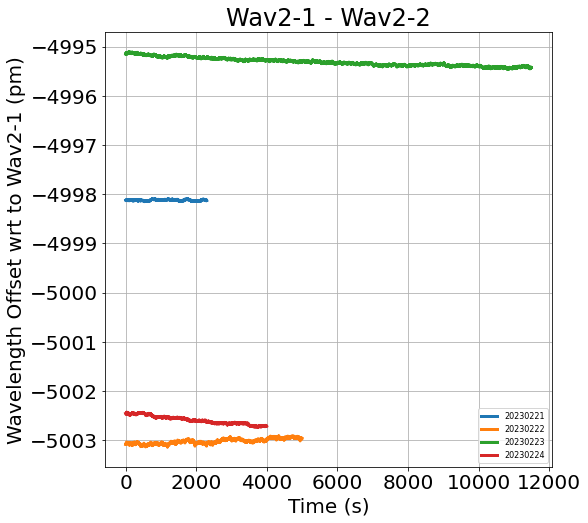

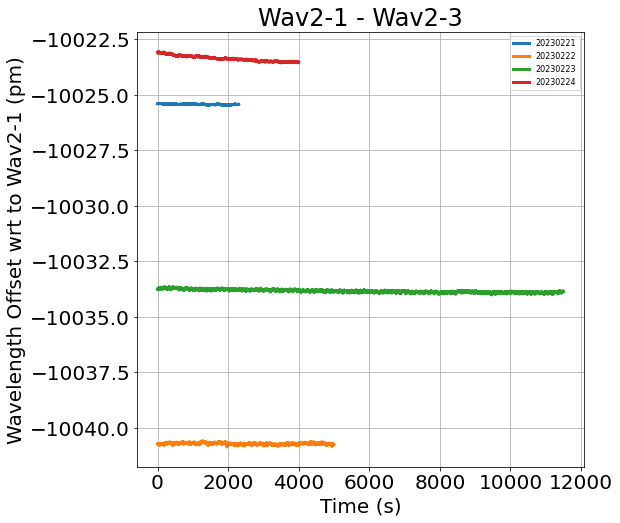

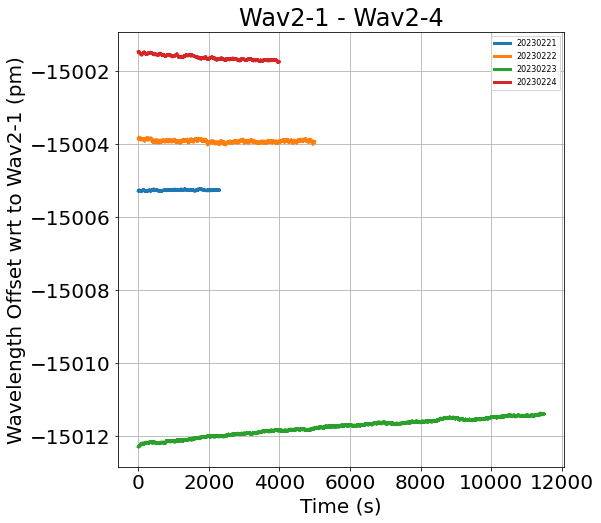

In [10]:
for sensor in ["Wav2-2", "Wav2-3", "Wav2-4"]:    
    plt.figure(figsize=(8,8))
    for path in path_to_split_list:
        temp = pd.read_csv(path+"temperature.txt", header=0)
        peaks = getters.get_data(path_to_split=path, pol="P")
        t0 = temp["Timestamp"][0]
        date = path.split("/")[-2]
        tini, tend = plateaus[date]["253_down"][0], plateaus[date]["253_down"][1]
        temp = temp.loc[(temp["Timestamp"]-t0>tini)&(temp["Timestamp"]-t0<tend)].reset_index(drop=True)
        peaks = peaks.loc[(peaks["Timestamp"]-t0>tini)&(peaks["Timestamp"]-t0<tend)]
        t0 = temp["Timestamp"][0]
        plt.plot(peaks["Timestamp"]-t0, (peaks["Wav2-1"]-peaks[sensor])*1e12, label=date)
        plt.title("Wav2-1 - " + sensor)
        plt.ylabel("Wavelength Offset wrt to Wav2-1 (pm)")
        plt.xlabel("Time (s)")
        plt.legend(fontsize=8)
    plt.show()